### Probabilistic Machine Learning (Book 1)

Kevin P Murphy

#### Exercises, Chapter 4

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
def plot_gaussian(m, s2, label=None):
    xs = np.arange(m-np.sqrt(s2)*5, m+np.sqrt(s2)*5, 0.05)
    ys = [norm.pdf(x, loc=m, scale=np.sqrt(s2)) for x in xs]
    if label:
        plt.plot(xs, ys, label=label)
        plt.legend()
    else:
        plt.plot(xs, ys)

**Exercise 4.1** [MLE for the univariate Gaussian *]
Show that the MLE for a univariate Gaussian is given by:

$\hat{\mu} = \frac{1}{N}\sum_{n=1}^{N}y_{n},$

$\hat{\sigma}^2 = \frac{1}{N}\sum_{n=1}^{N}(y_{n} - \hat{\mu})^2.$

For the univariate Gaussian, we have likelihood:

$\mathcal{L} = \prod_{n=1}^{N}\frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{1}{2\sigma^2}\left(y_n-\mu\right)^2 \right\},$  so that the negative log likelihood is:

$NLL_{gaussian} = - \sum_{n=1}^{N}\log\left[\frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{1}{2\sigma^2}\left(y_n-\mu\right)^2 \right\}\right] $

$ = \sum_{n=1}^{N}\left[\frac{1}{2\sigma^2}(y_n-\mu)^2\right]- N \log \sigma + \text{const.}$

The MLE occurs at the stationary point

$\frac{\partial NLL_{gaussian}}{\partial \mu} = \frac{\partial NLL_{gaussian}}{\partial \sigma^2} = 0.$

Differentiating first w.r.t. $\mu,$

$\frac{\partial NLL_{gaussian}}{\partial \mu} = \frac{\partial}{\partial \mu}\left[\sum_{n=1}^{N}\left\{\frac{1}{2\sigma^2}\left(y_n - \mu\right)^2 \right\} \right] 
= \frac{\partial}{\partial \mu}\left[\sum_{n=1}^{N}\left\{\frac{1}{2\sigma^2}\left(\mu^2 - 2\mu y_n\right) \right\} \right]
= \frac{\partial}{\partial \mu}\left[\left\{\frac{1}{2\sigma^2}\left(N\mu^2 - 2\mu \sum_{n=1}^{N} y_n \right) \right\} \right]
= \frac{1}{2\sigma^2}\left(2N\mu - 2 \sum_{n=1}^{N} y_n \right).$

$\Rightarrow N\hat{\mu} = \sum_{n=1}^{N} y_n, $ 

so $\hat{\mu} = \frac{1}{N}\sum_{n=1}^{N} y_n = \bar{y}.$

Differentiating w.r.t. $\sigma^2,$

$\frac{\partial NLL_{gaussian}}{\partial \sigma^2} = \frac{\partial}{\partial \sigma^2}\left[\sum_{n=1}^{N}\left\{\frac{1}{2\sigma^2}\left(y_n - \mu\right)^2 \right\} - N \log \sigma \right]
= \frac{\partial}{\partial \sigma^2}\left[\sum_{n=1}^{N}\left\{\frac{1}{2}(\sigma^2)^{-1}\left(y_n - \mu\right)^2 \right\} - N \log (\sigma^2)^{1/2} \right]$

$=(-1)\sum_{n=1}^{N}\left\{\frac{1}{2}(\sigma^2)^{-2}\left(y_n - \mu\right)^2 \right\} - \frac{N}{2\sigma^2}
= \frac{1}{2}(\sigma)^{-4}\sum_{n=1}^{N}\left(y_n - \mu\right)^2 - \frac{N}{2\sigma^2}.$

Therefore, at the stationary point corresponding to the MLE,

$\frac{1}{2}\hat{\sigma}^{-4}\sum_{n=1}^{N}\left(y_n - \hat{\mu}\right)^2 = \frac{N}{2\hat{\sigma}^2}$.

$\Rightarrow \sum_{n=1}^{N}\left(y_n - \hat{\mu}\right)^2 = N \hat{\sigma}^2,$

so

$\hat{\sigma}^2 = \frac{1}{N}\sum_{n=1}^{N}\left(y_n - \hat{\mu}\right)^2 = \frac{1}{N}\sum_{n=1}^{N}\left(y_n - \bar{y}\right)^2.$

**Exercise 4.2** [MAP estimation for 1D Gaussians *] (Source: Jaakkola.)

Consider samples $x_1, \ldots, x_n$ from a Gaussian random variable with known variance $\sigma^2$ and unknown mean $\mu$. We further assume a prior distribution (also Gaussian) over the mean, $\mu \sim \mathcal{N}(m, s^2)$, with fixed mean m and fixed variance $s^2$. Thus the only unknown is $\mu$.

a. Calculate the MAP estimate $\hat{\mu}_{MAP}$ . You can state the result without proof. Alternatively, with a lot more work, you can compute derivatives of the log posterior, set to zero and solve.

b. Show that as the number of samples $n$ increase, the MAP estimate converges to the maximum likelihood estimate.

c. Suppose $n$ is small and fixed. What does the MAP estimator converge to if we increase the prior variance $s^2$?

d. Suppose $n$ is small and fixed. What does the MAP estimator converge to if we decrease the prior variance $s^2$?


a. 

The MAP estimate for $\mu$ corresponds to finding the mode for the posterior for a Gaussian likelihood

$p(\mathcal{D}|\mu, \sigma^2) = \prod_{i=1}^{N}\mathcal{N}(x_i|\mu, \sigma^2)$

and Gaussian prior

$p(\mu) = \mathcal{N}(\mu| m, s^2).$

We know from section 4.6.4.1 that this posterior will be normal

$p(\mu| \mathcal{D}, \sigma^2) = \mathcal{N}(\mu| \tilde{m}, \tilde{s}^2)$

with variance given by

$\tilde{s}^2 = \frac{\sigma^2 s^2}{n s^2 + \sigma^2}$

and mean given by

$\tilde{m} = \frac{\sigma^2}{n \tilde{s}^2 + \sigma^2}m + \frac{ns^2}{n \tilde{s}^2 + \sigma^2}\bar{x},$

where $\bar{x}$ is the sample mean.

Since the mode for a normal distribution coincides with the mean, we have

$\hat{\mu}_{MAP} = \frac{\sigma^2}{n \tilde{s}^2 + \sigma^2}m + \frac{ns^2}{n \tilde{s}^2 + \sigma^2}\bar{x}.$

b.

As the number of samples $n$ increases, the MAP estimate will converge to:

$\hat{\mu}_{MAP} \approx \frac{ns^2}{n \tilde{s}^2 + \sigma^2}\bar{x},$

since the other term in the sum will tend to zero due to the inverse $n$ term.  As $n$ becomes large compared to $\sigma^2$ we will have 

$\hat{\mu}_{MAP} \approx \bar{x} = \hat{\mu}_{MLE}.$

c.

If $n$ is small and fixed, increasing the prior variance $s^2$ will cause the MAP estimator to converge to $\bar{x}$, as the $ns^2$ becomes increasingly large with respect to $\sigma^2.$

d.

If $n$ is small and fixed, decreasing the prior variance $s^2$ will cause the MAP estimator to converge to the prior mean $m$, as th $ns^2$ becomes increasingly small with respect to $\sigma^2.$

**Exercise 4.3** [Gaussian posterior credible interval]

(Source: DeGroot.) Let $X \sim \mathcal{N}(\mu,\sigma^2 = 4)$ where $\mu$ is unknown but has prior $\mu \sim \mathcal{N}(\mu_{0},\sigma_0^2 = 9).$ The posterior after seeing $n$ samples is $\mu \sim \mathcal{N}(\mu_n,\sigma_n^2).$ (This is called a credible interval, and is the Bayesian analog of a confidence interval.) How big does $n$ have to be to ensure
$p(l \leq \mu_n \leq u|\mathcal{D}) \geq 0.95$ where $(l, u)$ is an interval (centered on $μ_n$) of width 1 and $\mathcal{D}$ is the data? Hint: recall that 95% of the
probability mass of a Gaussian is within $\pm1.96\sigma$ of the mean.

Since the variance $\sigma^2$ of the data, and the variance of the prior on $\mu$, $\sigma_0^2$, are both known, the variance of the posterior on $\mu,$ $\sigma_n^2,$ will be determined entirely by the sample size $n.$  The mean of the posterior $\mu_n$ will depend on the prior mean $\mu_0$ and the sample mean $\bar{x}$ as well as the sample size, but since we are concerned with an interval centered on $\mu_n,$ its value does not matter as far as this question is concerned.  

We can see this with a few different values of $\bar{x},$ $\mu_0,$ and $n$, where we first define a function to return the posterior mean and variance:

In [3]:
def get_posterior(xbar, n, μ_0, σ2=4, σ_02=9):
    # posterior variance:
    σ_n2 = (σ2*σ_02)/(n*σ_02 + σ2)
    # posterior mean:
    μ_n = (σ2)/(n*σ_02 + σ2)*μ_0 + (n*σ_02)/(n*σ_02 + σ2)*xbar
    return μ_n, σ_n2

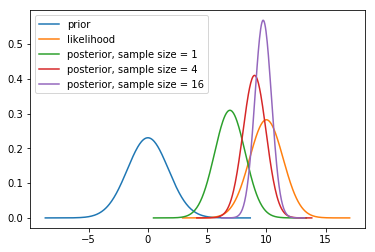

In [4]:
# xbar = 10, μ_0 = 0, n = 1, 4, 16
samplesizes = [1, 4, 16]
μ_0 = 0; xbar = 10; σ2=4; σ_02=9
results = {'μ_0': μ_0,
           'xbar': xbar,
           'σ2': σ2,
           'σ_02': σ_02,
           'posterior': {}
           }
for n in samplesizes:
    postmean, postvar = get_posterior(xbar, n, μ_0, σ2=σ2, σ_02=σ_02)
    results['posterior'][n] = {'postmean': postmean,
                               'postvar': postvar}
plot_gaussian(results['μ_0'], np.sqrt(results['σ_02']), label='prior')
plot_gaussian(results['xbar'], np.sqrt(results['σ2']), label='likelihood')
for n in results['posterior'].keys():
    plot_gaussian(results['posterior'][n]['postmean'], 
                  np.sqrt(results['posterior'][n]['postvar']),
                  label=f'posterior, sample size = {n}')

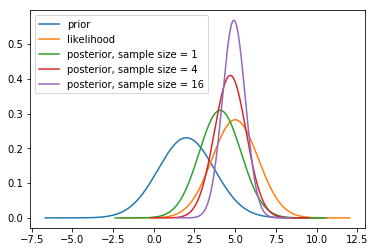

In [5]:
# xbar = 5, μ_0 = 2, n = 1, 4, 16
samplesizes = [1, 4, 16]
μ_0 = 2; xbar = 5; σ2=4; σ_02=9
results = {'μ_0': μ_0,
           'xbar': xbar,
           'σ2': σ2,
           'σ_02': σ_02,
           'posterior': {}
           }
for n in samplesizes:
    postmean, postvar = get_posterior(xbar, n, μ_0, σ2=σ2, σ_02=σ_02)
    results['posterior'][n] = {'postmean': postmean,
                               'postvar': postvar}
plot_gaussian(results['μ_0'], np.sqrt(results['σ_02']), label='prior')
plot_gaussian(results['xbar'], np.sqrt(results['σ2']), label='likelihood')
for n in results['posterior'].keys():
    plot_gaussian(results['posterior'][n]['postmean'], 
                  np.sqrt(results['posterior'][n]['postvar']),
                  label=f'posterior, sample size = {n}')

As we see from the two examples, the location of the posterior moves, depending on the prior location and the sample mean, but for a given sample size, the shape (i.e., the variance) of the posterior is the same.

What the question asks is above what sample size at least 95% of the posterior mass will be contained within the interval ($\mu_n-0.5$, $\mu_n + 0.5$).  We know that 95% of the posterior mass is contained within the interval ($\mu_n-1.96\sigma_n$, $\mu_n + 1.96\sigma_n$), where $\sigma_n$ is the standard deviation of the posterior.  Hence the condition will be satisfied for any value of $n$ such that $1.96\sigma_n \lt 0.5,$ so that the second interval is contained within the first.  We can just calculate the value of $1.96\sigma_n$ for several values of $n$:

In [6]:
for n in range(1, 81, 10):
    _, postvar = get_posterior(xbar, n, μ_0)
    print(f"sample size: {n}\t1.96 x σ_n: {1.96 * np.sqrt(postvar):.4f}")

sample size: 1	1.96 x σ_n: 3.2616
sample size: 11	1.96 x σ_n: 1.1587
sample size: 21	1.96 x σ_n: 0.8465
sample size: 31	1.96 x σ_n: 0.6991
sample size: 41	1.96 x σ_n: 0.6089
sample size: 51	1.96 x σ_n: 0.5465
sample size: 61	1.96 x σ_n: 0.5001
sample size: 71	1.96 x σ_n: 0.4638


In [7]:
for n in range(61, 66):
    _, postvar = get_posterior(xbar, n, μ_0)
    print(f"sample size: {n}\t1.96 x σ_n: {1.96 * np.sqrt(postvar):.4f}")

sample size: 61	1.96 x σ_n: 0.5001
sample size: 62	1.96 x σ_n: 0.4961
sample size: 63	1.96 x σ_n: 0.4921
sample size: 64	1.96 x σ_n: 0.4883
sample size: 65	1.96 x σ_n: 0.4846


Hence for a sample size equal or above $n = 62,$ the condition is met and 95% of the posterior mass is contained within $\mu_n \pm 0.5.$

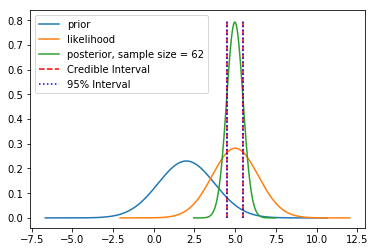

In [8]:
# xbar = 5, μ_0 = 2, n = 62
n=62
samplesizes = [n]
μ_0 = 2; xbar = 5; σ2=4; σ_02=9
results = {'μ_0': μ_0,
           'xbar': xbar,
           'σ2': σ2,
           'σ_02': σ_02,
           'posterior': {}
           }
for n in samplesizes:
    postmean, postvar = get_posterior(xbar, n, μ_0, σ2=σ2, σ_02=σ_02)
    results['posterior'][n] = {'postmean': postmean,
                               'postvar': postvar}
plot_gaussian(results['μ_0'], np.sqrt(results['σ_02']), label='prior')
plot_gaussian(results['xbar'], np.sqrt(results['σ2']), label='likelihood')
for n in results['posterior'].keys():
    plot_gaussian(results['posterior'][n]['postmean'], 
                  np.sqrt(results['posterior'][n]['postvar']),
                  label=f'posterior, sample size = {n}')
# plot the "credible interval"
postmean = results['posterior'][n]['postmean']
plt.plot([postmean - 0.5, postmean - 0.5], [0, 0.8], '--', c='r')
plt.plot([postmean + 0.5, postmean + 0.5], [0, 0.8], '--', c='r', 
         label='Credible Interval')
# plot the posterior mean +/- 1.96*std
poststd = np.sqrt(results['posterior'][n]['postvar'])
plt.plot([postmean - 1.96*poststd, postmean - 1.96*poststd], [0, 0.8], ':', c='b')
plt.plot([postmean + 1.96*poststd, postmean + 1.96*poststd], [0, 0.8], ':', c='b', 
         label='95% Interval')
plt.legend()

If we take a smaller sample size (say 36), we can see that the 95% interval is clearly smaller than the $\pm0.5$ interval:

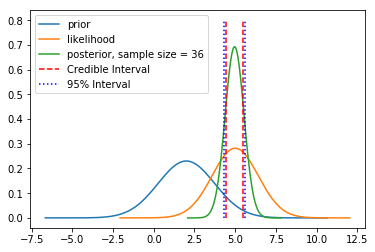

In [9]:
# xbar = 5, μ_0 = 2, n = 51
n=36
samplesizes = [n]
μ_0 = 2; xbar = 5; σ2=4; σ_02=9
results = {'μ_0': μ_0,
           'xbar': xbar,
           'σ2': σ2,
           'σ_02': σ_02,
           'posterior': {}
           }
for n in samplesizes:
    postmean, postvar = get_posterior(xbar, n, μ_0, σ2=σ2, σ_02=σ_02)
    results['posterior'][n] = {'postmean': postmean,
                               'postvar': postvar}
plot_gaussian(results['μ_0'], np.sqrt(results['σ_02']), label='prior')
plot_gaussian(results['xbar'], np.sqrt(results['σ2']), label='likelihood')
for n in results['posterior'].keys():
    plot_gaussian(results['posterior'][n]['postmean'], 
                  np.sqrt(results['posterior'][n]['postvar']),
                  label=f'posterior, sample size = {n}')
# plot the "credible interval"
postmean = results['posterior'][n]['postmean']
plt.plot([postmean - 0.5, postmean - 0.5], [0, 0.8], '--', c='r')
plt.plot([postmean + 0.5, postmean + 0.5], [0, 0.8], '--', c='r', 
         label='Credible Interval')
# plot the posterior mean +/- 1.96*std
poststd = np.sqrt(results['posterior'][n]['postvar'])
plt.plot([postmean - 1.96*poststd, postmean - 1.96*poststd], [0, 0.8], ':', c='b')
plt.plot([postmean + 1.96*poststd, postmean + 1.96*poststd], [0, 0.8], ':', c='b', 
         label='95% Interval')
plt.legend()

**Exercise 4.4** [BIC for Gaussians *]

(Source: Jaakkola.)
The Bayesian information criterion (BIC) is a penalized log-likelihood function that can be used for model selection. It is defined as


$\text{BIC} = \text{log} p(\mathcal{D}|\hat{\theta}^{ML}) − \frac{d}{2} \text{log}(N)$

where $d$ is the number of free parameters in the model and $N$ is the number of samples. In this question, we will see how to use this to choose between a full covariance Gaussian and a Gaussian with a diagonal covariance. Obviously a full covariance Gaussian has higher likelihood, but it may not be “worth” the extra parameters if the improvement over a diagonal covariance matrix is too small. So we use the BIC score to choose the model.

We can write

$\text{log} p(\mathcal{D}|\hat{\Sigma}, \hat{\mu}) = -\frac{N}{2} \text{tr} (\hat{\Sigma}^{-1}\hat{S})- \frac{N}{2}\text{log}(|\hat{\Sigma}|)$

$\hat{S} = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{x})(x_i - \bar{x})^T$

where $\hat{S}$ is the scatter matrix (empirical covariance), the trace of a matrix is the sum of its diagonals, and we have used the trace trick.

a. Derive the BIC score for a Gaussian in $D$ dimensions with full covariance matrix. Simplify your answer as much as possible, exploiting the form of the MLE. Be sure to specify the number of free parameters $d$.

b. Derive the BIC score for a Gaussian in $D$ dimensions with a diagonal covariance matrix. Be sure to specify the number of free parameters $d$. Hint: for the diagonal case, the ML estimate of $\Sigma$ is the same as $\Sigma^{ML}$ except the off-diagonal terms are zero:

$\Sigma^{diag} = \text{diag}(\Sigma^{ML}(1, 1),\ldots,\Sigma^{ML}(D, D)).$

N.B., comparing the above expression for the log likelihood of a multivariate gaussian to equations (4.45) and (4.46):

(i) the term that involves the determinant is negative here, since here it is the determinant of $\hat{\Sigma}$, while in equation (4.45) it is the determinant of $\Lambda = \Sigma^{-1},$ and these quantities are each equal to the others reciprocal (i.e, the determinant of a matrix is equal to one divided by the determinant of its inverse),

(ii) The scatter matrix is defined differently here wrt equation (4.46) where it did not include the normalizing $\frac{1}{N}$ term (which ensures that all diagonal elements are unity).  Hence in (4.45) the coefficient term in front of the trace term is $\frac{1}{2}$ rather than the $\frac{N}{2}$ above.

(iii) In equation (4.45) the order of the terms inside the trace are reversed.  This gives the same quantity, however, since $\text{tr}(AB) = \text{tr}(BA).$

a.

We have from equation (4.51) that 

$\hat{\Sigma} = \hat{S},$

given that the definition of $\hat{S}$ here includes the $\frac{1}{N}$ factor (see (ii) above).  The matrix $\hat{S}$ has $D$ dimensions, as required.

Hence we have:

$\text{log} p(\mathcal{D}|\hat{\Sigma}, \hat{\mu}) = -\frac{N}{2} \text{tr} (\hat{S}^{-1}\hat{S})- \frac{N}{2}\text{log}(|\hat{S}|)$

$= -\frac{N}{2} \text{tr} (I)- \frac{N}{2}\text{log}(|\hat{S}|)$

$= -\frac{ND}{2} - \frac{N}{2}\text{log}(|\hat{S}|).$

Hence the BIC score for a multivariate gaussian in $D$ dimensions, using the full MLE covariance matrix for $\Sigma,$ is given by:

$\text{BIC}_{full} = -\frac{ND}{2} - \frac{N}{2}\text{log}(|\hat{S}|) - \frac{d}{2}\text{log}(N)$

$= -\frac{ND}{2} - \frac{N}{2}\text{log}(|\hat{S}|) - \frac{D(D-1)}{2}\text{log}(N),$

since for the full MLE covariance case, we have $D(D-1)$ free parameters (one for each upper-diagonal element of $\hat{\Sigma}$).

b.

In this case our covariance estimate $\hat{\Sigma}_{diag} = \hat{S}_{diag}$ contains only the diagonal elements of the full MLE covariance estimate $\hat{S}$, all other elements are set to zero.  This gives us:

$\text{log} p(\mathcal{D}|\hat{\Sigma}_{diag}, \hat{\mu}) = -\frac{N}{2} \text{tr} (\hat{S}_{diag}^{-1}\hat{S})- \frac{N}{2}\text{log}(|\hat{S}_{diag}|)$

$ = -\frac{N}{2} \text{tr} (\hat{S}_{diag}^{-1}\hat{S})- \frac{N}{2}\text{log}(1) = -\frac{N}{2} \text{tr} (\hat{S}_{diag}^{-1}\hat{S}).$

Since we know that the diagonal elements of $\hat{S}$ are all one, this reduces to:

$\text{log} p(\mathcal{D}|\hat{\Sigma}_{diag} = -\frac{N}{2} \text{tr} (I) = -\frac{ND}{2}.$

The number of free parameters is now also smaller, $D$, since there is now one only for each diagonal element of $\hat{S}.$  Thus we have

$\text{BIC}_{diag} = -\frac{ND}{2} - \frac{D}{2}\text{log}(N).$

Should we use $\hat{\Sigma}_{MLE}$ or $\hat{\Sigma}_{MLE}^{diag}$?

The $- \frac{N}{2}\text{log}(|\hat{S}|)$ term in $\text{BIC}_{full}$ will provide a positive contribution to the BIC score, since $0 \lt |\hat{S}| \leq 1.$  This contribution will be greatest for values of $|\hat{S}|$ which are very small, corresponding to scatter matrices for which the off-diagonal elements are higher, i.e., for systems which have higher correlations between covariates.  This is intuitive - the full MLE covariance matrix captures the effect of the correlations while the diagonal version does not.

However, this is offset by the penalty term $-\frac{d}{2}\text{log}(N),$ which will provide a negative contribution to the BIC score in both cases, but is greater for the $\text{BIC}_{full}$ case by a factor of $D-1.$

Hence, for strongly-correlated, low-dimensional systems, it may be worth using the full $\hat{\Sigma}_{MLE}$ (i.e., the BIC score may be higher), however for less strongly-correlated or higher dimensional systems the diagonal version will likely be the better choice.

**Exercise 4.5** [BIC for a 2d discrete distribution] (Source: Jaakkola.)

Let x ∈ {0, 1} denote the result of a coin toss (x = 0 for tails, x = 1 for heads). The coin is potentially biased, so that heads occurs with probability θ1. Suppose that someone else observes the coin flip and reports to you the outcome, y. But this person is unreliable and only reports the result correctly with probability θ2; i.e., p(y|x, θ2) is given by

         y=0     y=1 
    x=0   θ2     1−θ2
    x=1  1−θ2     θ2 

Assume that θ2 is independent of x and θ1.

a. Write down the joint probability distribution p(x, y|θ) as a 2 × 2 table, in terms of $\theta = (\theta_1, \theta_2)$.

b. Suppose have the following dataset: $x = (1,1,0,1,1,0,0)$, $y = (1,0,0,0,1,0,1)$. What are the MLEs for θ1 and θ2? Justify your answer. Hint: note that the likelihood function factorizes,
$p(x, y|\theta) = p(y|x, \theta_2)p(x|\theta_1)$

What is $p(\mathcal{D}|\hat{\theta},M_2)$ where $M_2$ denotes this 2-parameter model? (You may leave your answer in fractional form if you wish.)

c. Now consider a model with 4 parameters, $\theta (\theta_{0,0},\theta_{0,1},\theta_{1,0},\theta_{1,1})$, representing $p(x,y|\theta) = \theta_{x,y}$. (Only 3 of these parameters are free to vary, since they must sum to one.) What is the MLE of $\theta$? What is $p(\mathcal{D}|\hat{\theta}, M_4)$ where $M_4$ denotes this 4-parameter model?

d. Suppose we are not sure which model is correct. We compute the leave-one-out cross validated log likelihood of the 2-parameter model and the 4-parameter model as follows:

$L(m) = \sum_{i=1}^{n}\text{log}p(x_i,y_i|m, \hat{\theta}(\mathcal{D}_{-i}))$

and $\hat{\theta}(\mathcal{D}_{-i})$ denotes the MLE computed on $\mathcal{D}$ excluding row $i$. Which model will CV pick and why?
Hint: notice how the table of counts changes when you omit each training case one at a time.

e. Recall that an alternative to CV is to use the BIC score, defined as

$\text{BIC}(M,D) = \text{log} p(\mathcal{D}|\hat{\theta}^{MLE})− dof(M) \text{log}(N)$

where $dof(M)$ is the number of free parameters in the model, Compute the BIC scores for both models (use log base $e$). Which model does BIC prefer?

a.

Since $\theta_2$ is independent of $x, \theta_1,$ we can write the joint probability for each outcome $x=X, y=Y$ as the product of $p(x=X, \theta_1)$ and $p(y=Y|x=X, \theta_2)$, i.e.:

           y=0            y=1 
    x=0  (1-θ1)θ2    (1−θ1)(1−θ2)
    x=1   θ1(1−θ2)       θ1θ2

b.

Since $\theta_1$ and $\theta_2$ are both Bernoulli, the MLE estimate will be given by the number of positive examples divided by the total number of examples, i.e.,

$\hat{\theta_1}^{MLE} = \frac{N_{x=1}}{N_{TOTAL}},$

$\hat{\theta_2}^{MLE} = \frac{N_{y=x}}{N_{TOTAL}}.$

In [10]:
x = np.array([1, 1, 0, 1, 1, 0, 0])
y = np.array([1, 0, 0, 0, 1, 0, 1])

print(f"MLE θ_1 = {(x==1).sum()/len(x):.4f}")
print(f"MLE θ_2 = {(x==y).sum()/len(x):.4f}")

MLE θ_1 = 0.5714
MLE θ_2 = 0.5714


In [11]:
def bernoulli_likelihood(theta, xs):
    l = theta**(xs==1).sum() * (1-theta)**(xs==0).sum()
    return l

The probability of the data is given by:

$p(\mathcal{D}|\hat{\theta}, M_2) = p(y|x, \hat{\theta}_2)p(x|\hat{\theta}_1)$:

In [12]:
l = bernoulli_likelihood(0.5714, (y==x).astype(int)) * bernoulli_likelihood(0.5714, x)

print(f"Likelihood of the data with the two-parameter model: {l:.2e}")

Likelihood of the data with the two-parameter model: 7.04e-05


c.

One way we can do this is to do a grid search over values for $\theta_{0,0}, \theta_{0,1}, \theta_{1,0},$ with $\theta_{1,1}$ set as one minus the other three parameters, such that the likelihood is maximized:

In [13]:
def M4_likelihood(t00, t01, t10, xs, ys):
    
    assert (0 <= t00) and (t00 < 1)
    assert (0 <= t01) and (t01 < 1)
    assert (0 <= t10) and (t10 < 1)
    
    assert (t00+t01+t10) < 1
    
    t11 = 1 - t00 - t01 - t10
    
    n00 = ((xs==0) & (ys==0)).sum()
    n01 = ((xs==0) & (ys==1)).sum()
    n10 = ((xs==1) & (ys==0)).sum()
    n11 = ((xs==1) & (ys==1)).sum()
    
    l = t00**n00 * t01**n01 * t10**n10 * t11**n11
    
    return t00, t01, t10, t11, l

In [15]:
L = []
size = 0.1

for t00 in np.arange(size, 1.0, size):
    for t01 in np.arange(size, 1.0, size):
        for t10 in np.arange(size, 1.0, size):
            if (t00+t01+t10) < 1:
                L.append(M4_likelihood(t00, t01, t10, x, y))

In [28]:
np.array(L)[np.array(L)[:, 4] == np.array(L)[:, 4].max()]

array([[3.00e-01, 1.00e-01, 3.00e-01, 3.00e-01, 7.29e-05]])

In [29]:
L = []
size = 0.01

for t00 in np.arange(3.00e-01 - 10*size, 3.00e-01 + 10*size, size):
    for t01 in np.arange(1.00e-01 - 10*size, 1.00e-01 + 10*size, size):
        for t10 in np.arange(3.00e-01 - 10*size, 3.00e-01 + 10*size, size):
            if (t00+t01+t10) < 1:
                L.append(M4_likelihood(t00, t01, t10, x, y))

In [30]:
np.array(L)[np.array(L)[:, 4] == np.array(L)[:, 4].max()]

array([[2.90000000e-01, 1.40000000e-01, 2.90000000e-01, 2.80000000e-01,
        7.76311626e-05]])

In [31]:
L = []
size = 0.001

for t00 in np.arange(2.9E-01 - 10*size, 2.9e-01 + 10*size, size):
    for t01 in np.arange(1.40e-01 - 10*size, 1.40e-01 + 10*size, size):
        for t10 in np.arange(2.90e-01 - 10*size, 2.90e-01 + 10*size, size):
            if (t00+t01+t10) < 1:
                L.append(M4_likelihood(t00, t01, t10, x, y))

In [32]:
np.array(L)[np.array(L)[:, 4] == np.array(L)[:, 4].max()]

array([[2.85000000e-01, 1.43000000e-01, 2.86000000e-01, 2.86000000e-01,
        7.77123228e-05]])

In [34]:
L = []
size = 0.0001

for t00 in np.arange(2.85E-01 - 10*size, 2.85e-01 + 10*size, size):
    for t01 in np.arange(1.43e-01 - 10*size, 1.43e-01 + 10*size, size):
        for t10 in np.arange(2.86e-01 - 10*size, 2.86e-01 + 10*size, size):
            if (t00+t01+t10) < 1:
                L.append(M4_likelihood(t00, t01, t10, x, y))
                
np.array(L)[np.array(L)[:, 4] == np.array(L)[:, 4].max()]

array([[2.85700000e-01, 1.42900000e-01, 2.85700000e-01, 2.85700000e-01,
        7.77129994e-05]])

As should have been obvious, the maximum likelihood for each theta is simply the number of examples corresponding to the combination of $x$ and $y,$ divided by the total number of examples:

In [41]:
print(f'θ_0_0: {((x==0) & (y==0)).sum() / len(x):.4f}')
print(f'θ_0_1: {((x==0) & (y==1)).sum() / len(x):.4f}')
print(f'θ_1_0: {((x==1) & (y==0)).sum() / len(x):.4f}')
print(f'θ_1_1: {((x==1) & (y==1)).sum() / len(x):.4f}')

θ_0_0: 0.2857
θ_0_1: 0.1429
θ_1_0: 0.2857
θ_1_1: 0.2857


Another way to think about this problem is as a multi-class classification with four classes.  From that viewpoint we can see that the MLE estimate for each $\theta$ will be simply the number of positive examples for that class divided by the total number of classes, which is what we see above.

What is the likelihood of the data with this model?

In [43]:
θ_0_0 = 0.2857
θ_0_1 = 0.1429
θ_1_0 = 0.2857
θ_1_1 = 0.2857

_, _, _, _, L = M4_likelihood(θ_0_0, θ_0_1, θ_1_0, x, y)

print(f"Likelihood of the data with the four-parameter model: {L:.2e}")

Likelihood of the data with the four-parameter model: 7.77e-05


d.

We calculate the leave-one-out CV log-likelihood in each case:

In [80]:
def CV_M2(xs, ys):
    ll = 0
    for ii in range(len(xs)):
        xs_t = list(xs).copy()
        ys_t = list(ys).copy()
        del xs_t[ii]
        del ys_t[ii]
        xs_t = np.array(xs_t)
        ys_t = np.array(ys_t)
        x_v = np.array([xs[ii]])
        y_v = np.array([ys[ii]])

        θ1_t = (xs_t==1).sum()/len(xs_t)
        θ2_t = (xs_t==ys_t).sum()/len(xs_t)
        
        v_likelihood = bernoulli_likelihood(θ2_t, (y_v==x_v).astype(int)) * \
                       bernoulli_likelihood(θ1_t, x_v)
        
        ll += np.log(v_likelihood)
        
    return ll

In [81]:
def CV_M4(xs, ys):
    ll = 0
    for ii in range(len(xs)):
        xs_t = list(xs).copy()
        ys_t = list(ys).copy()
        del xs_t[ii]
        del ys_t[ii]
        xs_t = np.array(xs_t)
        ys_t = np.array(ys_t)
        x_v = np.array([xs[ii]])
        y_v = np.array([ys[ii]])

        θ00_t = ((xs_t==0) & (ys_t==0)).sum() / len(xs_t)
        θ01_t = ((xs_t==0) & (ys_t==1)).sum() / len(xs_t)
        θ10_t = ((xs_t==1) & (ys_t==0)).sum() / len(xs_t)
        θ11_t = ((xs_t==1) & (ys_t==1)).sum() / len(xs_t)
        
        _, _, _, _, v_likelihood = M4_likelihood(θ00_t, θ01_t, θ10_t, x_v, y_v)

        ll += np.log(v_likelihood)
        
    return ll

In [82]:
print(f"Leave-one-out CV likelihood for the two-parameter model:\t{CV_M2(x, y):.4f}")
print(f"Leave-one-out CV likelihood for the four-parameter model:\t{CV_M4(x, y):.4f}")

Leave-one-out CV likelihood for the two-parameter model:	-12.1369
Leave-one-out CV likelihood for the four-parameter model:	-inf


/Users/cb/miniconda3/envs/bda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


The four-parameter model has a problem when the last row is used; this is the only example of $x=0$ and $y=1$ in the data set, hence it is left out of the training set, and leads to a likelihood of zero (and a log-likelihood of -inf) for this example.  The two-parameter model does not have this problem:

In [83]:
def CV_M2_params(xs, ys):
    ll = 0
    for ii in range(len(xs)):
        xs_t = list(xs).copy()
        ys_t = list(ys).copy()
        del xs_t[ii]
        del ys_t[ii]
        xs_t = np.array(xs_t)
        ys_t = np.array(ys_t)
        x_v = np.array([xs[ii]])
        y_v = np.array([ys[ii]])

        θ1_t = (xs_t==1).sum()/len(xs_t)
        θ2_t = (xs_t==ys_t).sum()/len(xs_t)
        
        print(f"row {ii} left out: θ1={θ1_t:.4f}\tθ2={θ2_t:.4f}")
        
    return None

def CV_M4_params(xs, ys):
    ll = 0
    for ii in range(len(xs)):
        xs_t = list(xs).copy()
        ys_t = list(ys).copy()
        del xs_t[ii]
        del ys_t[ii]
        xs_t = np.array(xs_t)
        ys_t = np.array(ys_t)
        x_v = np.array([xs[ii]])
        y_v = np.array([ys[ii]])

        θ00_t = ((xs_t==0) & (ys_t==0)).sum() / len(xs_t)
        θ01_t = ((xs_t==0) & (ys_t==1)).sum() / len(xs_t)
        θ10_t = ((xs_t==1) & (ys_t==0)).sum() / len(xs_t)
        θ11_t = ((xs_t==1) & (ys_t==1)).sum() / len(xs_t)

        print(f"row {ii} left out: θ00={θ00_t:.4f}\tθ01={θ01_t:.4f}\tθ10={θ10_t:.4f}\tθ11={θ11_t:.4f}\t")        
        
    return None

In [84]:
CV_M2_params(x, y)

row 0 left out: θ1=0.5000	θ2=0.5000
row 1 left out: θ1=0.5000	θ2=0.6667
row 2 left out: θ1=0.6667	θ2=0.5000
row 3 left out: θ1=0.5000	θ2=0.6667
row 4 left out: θ1=0.5000	θ2=0.5000
row 5 left out: θ1=0.6667	θ2=0.5000
row 6 left out: θ1=0.6667	θ2=0.6667


In [85]:
CV_M4_params(x, y)

row 0 left out: θ00=0.3333	θ01=0.1667	θ10=0.3333	θ11=0.1667	
row 1 left out: θ00=0.3333	θ01=0.1667	θ10=0.1667	θ11=0.3333	
row 2 left out: θ00=0.1667	θ01=0.1667	θ10=0.3333	θ11=0.3333	
row 3 left out: θ00=0.3333	θ01=0.1667	θ10=0.1667	θ11=0.3333	
row 4 left out: θ00=0.3333	θ01=0.1667	θ10=0.3333	θ11=0.1667	
row 5 left out: θ00=0.1667	θ01=0.1667	θ10=0.3333	θ11=0.3333	
row 6 left out: θ00=0.3333	θ01=0.0000	θ10=0.3333	θ11=0.3333	


e.

If we choose instead to use the BIC score instead of CV, we find:

In [93]:
θ1 = (x==1).sum()/len(x)
θ2 = (x==y).sum()/len(x)

l = bernoulli_likelihood(θ2, (y==x).astype(int)) * bernoulli_likelihood(θ1, x)

θ00 = ((x==0) & (y==0)).sum() / len(x)
θ01 = ((x==0) & (y==1)).sum() / len(x)
θ10 = ((x==1) & (y==0)).sum() / len(x)

_, _, _, _, L = M4_likelihood(θ00, θ01, θ10, x, y)

print(f"Log-likelihood of the data with the two-parameter model: {np.log(l):.2f}")
print(f"BIC score for the two-parameter model: {np.log(l) - 2/2 * np.log(len(x)):.2f}")
print()
print(f"Log-likelihood of the data with the four-parameter model: {np.log(L):.2f}")
print(f"BIC score for the four-parameter model: {np.log(L) - 3/2 * np.log(len(x)):.2f}")

Log-likelihood of the data with the two-parameter model: -9.56
BIC score for the two-parameter model: -11.51

Log-likelihood of the data with the four-parameter model: -9.46
BIC score for the four-parameter model: -12.38


Hence although the likelihood of the data is higher for the four-parameter model, the BIC score is significantly lower; BIC prefers the two-parameter model.

**Exercise 4.7** [ML estimator $\sigma_{mle}^{2}$ is biased]

Show that 

$\hat{\sigma}^{2}_{MLE} = \frac{1}{N}\sum_{n=1}^{N}(x_n-\hat{\mu})^2$

is a biased estimator of $\sigma^2$, i.e., show 

$\mathbb{E}_{X_1,\ldots,X_n \sim \mathcal{N}(\mu, \sigma)}[\hat{\sigma}^{2}_{MLE}(X_1, \ldots, X_N)] \neq \sigma^2.$

Hint: note that $X_1, \ldots, X_N$ are independent, and use the fact that the expectation of a product of independent random variables is the product of the expectations.

Changing the notation slightly, 

$\hat{\sigma}^{2}_{MLE} = \frac{1}{N}\sum_{i=1}^{N}(x_i-\hat{\mu})^2,$

$\Rightarrow \mathbb{E}[\hat{\sigma}^{2}_{MLE}] = \mathbb{E}[\frac{1}{N}\sum_{i=1}^{N}(x_i-\hat{\mu})^2]$

$ = \frac{1}{N}\mathbb{E}[\sum_{i=1}^{N}x_i^2 - 2\bar{x}\sum_{i=1}^{N}x_i + \sum_{i=1}^{N}\bar{x}^2]$

$ = \frac{1}{N}\mathbb{E}[\sum_{i=1}^{N}x_i^2 - 2\bar{x}N\bar{x} + N\bar{x}^2]$

$ = \frac{1}{N}\mathbb{E}[\sum_{i=1}^{N}x_i^2 - N\bar{x}^2]$

$ = \frac{1}{N}(N\mathbb{E}[x^2] - N\mathbb{E}[\bar{x}^2]) = \mathbb{E}[x^2] - \mathbb{E}[\bar{x}^2].$

Now

$ \sigma_x^2 = \mathbb{E}[x^2] - (\mathbb{E}[x])^2,$ and

$ \sigma_{\bar{x}}^2 = \mathbb{E}[\bar{x}^2] - (\mathbb{E}[\bar{x}])^2,$ 

so that, with $\mathbb{E}[\bar{x}] = \mathbb{E}[x] = \mu^2$, 

$\hat{\sigma}^{2}_{MLE} = (\sigma_x^2 + \mu^2) - (\sigma_{\bar{x}}^2 + \mu^2) = \sigma_x^2 - \sigma_{\bar{x}}^2.$

We know that

$\sigma_{\bar{x}}^2 = \text{Var}[\bar{x}] = \text{Var}[\frac{1}{N}\sum_{i=1}^N x_i] = \frac{1}{N^2}\text{Var}[\sum_{i=1}^N x_i] = \frac{1}{N^2}\sum_{i=1}^N\text{Var}[x],$

where we have used the fact that the $x_i$ are i.i.d., and that, for independent r.v.s $X_i$:

$\text{Var}[\sum_{i=1}^N X_i] = \sum_{i=1}^N\text{Var}[X_i].$

So $\sigma_{\bar{x}}^2 = \frac{1}{N^2}\sum_{i=1}^N \sigma_x^2 = \frac{1}{N} \sigma_x^2,$

and plugging in, 

$\hat{\sigma}^{2}_{MLE} = \sigma_x^2 - \sigma_{\bar{x}}^2 = (1 - \frac{1}{N})\sigma_x^2 = \frac{N-1}{N}\sigma_x^2.$

Hence the MLE variance estimator is not unbiased.

**Exercise 4.8** [Estimation of σ2 when μ is known *]

Suppose we sample $x_1, \ldots, x_N \sim \mathcal{N}(\mu, \sigma^2)$ where $\mu$ is a _known_ constant. Derive an expression for the MLE
for $\sigma^2$ in this case. Is it unbiased?

In this case,

$\mathbb{E}[\hat{\sigma}^{2}_{MLE}] = \mathbb{E}[\frac{1}{N}\sum_{i=1}^{N}(x_i-\mu)^2]$

$= \mathbb{E}[\frac{1}{N}\sum_{i=1}^{N}(x_i^2 -2x_i\mu +\mu^2)]$

$=\frac{1}{N} \mathbb{E}[\sum_{i=1}^{N}x_i^2 -2\mu\sum_{i=1}^{N}x_i +\sum_{i=1}^{N}\mu^2]$

$=\frac{1}{N} (N\mathbb{E}[x^2] -2N\mu\mathbb{E}[\bar{x}] + N\mu^2)$

$= \mathbb{E}[x^2] -2\mu\mathbb{E}[\bar{x}] + \mu^2$

$= \mathbb{E}[x^2] -2\mu^2 + \mu^2$

$= \mathbb{E}[x^2] - \mu^2$

$= \mathbb{E}[x^2] - (\mathbb{E}[x])^2 = \sigma^2,$

hence when $\mu$ is a known constant, the MLE variance _is_ unbiased.